# DS106-05 ML - Examples
Natural Language Processing

---

## Import Packages
- `requests` -> read in data from a webpage
- `BeautifulSoup` -> process raw data
- `nltk` -> as the definitive natural language processing package 
- `RegexpTokenizer` -> to break down data into words. 
- `matplotlib` and `seaborn` -> to visualize the frequency counts of words at the end

---
<font color=red>
    <h4>Correcting for <code>nltk</code> LookupError</h4></font>

Got a LookupError that `nltk` was not not found;<br>
Followed suggestion from documentation at [nltk.org](https://www.nltk.org/data.html):
> `import nltk`<br>
> `nltk.download()`

In [1]:
# import nltk

In [2]:
# nltk.download()

---

In [3]:
import requests
from bs4 import BeautifulSoup
import nltk

from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
## Read In Text Data
Start by taking a URL to a webpage and assigning it a variable name, in this case, `url`.
</br>This particular URL above goes to an e-book, _The Count of Monte Cristo_, by Alexander Dumas.

In [4]:
url = 'http://www.gutenberg.org/files/1184/1184-h/1184-h.htm'

#### Request Data
Make a request to get data from the specified URL.</br>This will use the function `requests.get()`, and you are making it to the `url` webpage you just saved:

In [5]:
r = requests.get(url)

#### Request Type
Find out the type of that request if you like by using the function `type()`:

In [21]:
type(r)

requests.models.Response

---
## Convert Text to Soup
The next few lines take the data off the webpage and extract the text, then use the `html5lib` to convert it into something you'll be able to process and better understand, called _soup_.

In [7]:
html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

#### Soup Type
You know the first two lines worked, because when you determine the type with that `type()` function, it will give you back: `bs4.BeautifulSoup`

In [8]:
type(soup)

bs4.BeautifulSoup

---
## Use HTML Tags to Extract Useful Info
If you know your HTML, and the website is designed well, you can then call out certain pieces of this text. For instance, the title.</br>
`soup` is the name of the webpage broken into HTML, then you are calling the `title` tag from the HTML and asking for Python to give it back as `.string`. The result should be this:

In [9]:
soup.title.string

'The Project Gutenberg eBook of The Count of Monte Cristo, by Alexandre Dumas, pÃ¨re'

---
<font color=green>
<h4>Fun Fact!</h4></br>
There are many other HTML tags, and you make use of them to get all sorts of information out of a webpage. The problem is, each website is typically set up a little differently, and you'll actually need to peek at the structure of the webpage to make the right HTML tag calls.
</br></br>If you happen to already know HTML, this will be a great place to play around. If not, don't worry - there are other ways to play with soup that aren't so messy.
</font>

--- 
# Tokenize the Data
_tokens_ are the text broken down into words.
1. function `get_text()` to retrieves your text
2. function `RegexpTokenizer()` breaks it down into words, separated by spaces. (in the language RegEx, `\w+` is the symbol for space)
3. function `tokenize()` will actually perform the operation, and you will get the first five words with argument `[:5]`:

In [10]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:5]

['The', 'Project', 'Gutenberg', 'eBook', 'of']

---
## Remove Capitalization

Remove capitalization with a `for` loop:
1. creates a `for` loop
2. function `lower()` strips caps
3. assigns the results to a dictionary called `words`

In [11]:
words = []
for word in tokens:
    words.append(word.lower())

#### Look at Dictionary
Look at the first 5 entries in the dictionary:

In [12]:
words[:5]

['the', 'project', 'gutenberg', 'ebook', 'of']

---
### Note on _Text Preprocessing_
> _**text preprocessing**_ - To preprocess your text simply means to bring your text into a form that is predictable and analyzable for your task.

Removing captilazation is part of _**text preprocessing**_ along with other actions like **lowercasing**, **stemming**, **stopword removing**, etc.

If you'd like to learn about other text pre-processing, check out **[this article](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html)**.

---
## Remove _Stopwords_
_**Stopwords**_ are a set of commonly used words in a language. Examples of stopwords in English are `a`, `the`, `is`, `are` and etc. 

These words don't have any emotional context, descriptive information, or tell you anything about the subject. So you'll want to filter these out, and others like them, so they don't clutter up your analysis.

The intuition behind using _stopwords_ is that, by removing low information words from text, we can focus on the important words instead.

---

`nltk` has a list of common _stopwords_.<br>
Make a usable list for filtering your text:

In [13]:
stopwords = nltk.corpus.stopwords.words('english')

#### Look at Stopwords
Look at the first 10 stopwords from your text:

In [14]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### Filter out the stopwords
Remove _stopwords_ with a for loop:

1. creates a `for` loop
2. makes a dictionary named `wordsWithoutStops` that filters out all the stopwords

In [15]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

#### Look at resulting words without stops
Look at the first 5 words without stops:

In [16]:
wordsWithoutStops[:5]

['project', 'gutenberg', 'ebook', 'count', 'monte']

---
## Count and Plot Words

#### Count frequency of words
Function `nltk.FreqDist()` returns frequence counts for all words in the `wordsWithoutStops` dictionary:

In [17]:
frequencyDis = nltk.FreqDist(wordsWithoutStops)

#### Plot frequency of words
Plot the word freqency counts with `.plot()` command from `matplotlib`. <br>The argument `25` specifies plotting only the top 25 words.

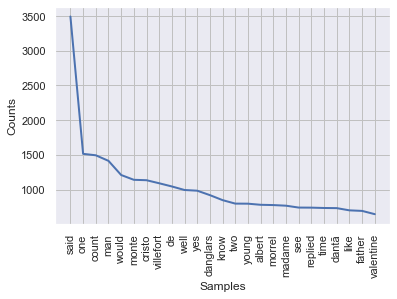

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Apply the default seaborn theme, scaling, and color palette.
sns.set()
frequencyDis.plot(25)

---
# ☙ Fin. ❧